In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import lightkurve as lk
import astropy.units as u
import tkinter as tk
from tkinter import ttk
from matplotlib.figure import Figure
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
from sklearn.exceptions import ConvergenceWarning
from datetime import datetime

In [3]:
types = pd.read_csv('asu (2).tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)
types = types.drop([0,1])
types = types.reset_index()
types = types.drop('index',axis = 1)
types

/var/folders/q0/j2_r46dn4g923tw2ygktb44w0000gn/T/ipykernel_48919/1208548947.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  types = pd.read_csv('asu (2).tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)


,_1,Type,RAJ2000,DEJ2000
0,312.908065 -41.341475,MISC,312.90804,-41.34142
1,NaN,NaN,NaN,NaN
2,311.509773 -38.03733,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,316.664941 -45.311435,NaN,NaN,NaN
...,...,...,...,...
1715983,NaN,NaN,NaN,NaN
1715984,46.080168 -62.32618,NaN,NaN,NaN
1715985,NaN,NaN,NaN,NaN
1715986,51.613651 -72.740089,NaN,NaN,NaN


In [4]:
l = []
for i in range(len(types['_1'])):
    if type(types['_1'][i]) != str:
        l.append(i)
        
types = types.drop(l)
types = types.reset_index()
cropped = types.drop('index',axis = 1)
cropped

,_1,Type,RAJ2000,DEJ2000
0,312.908065 -41.341475,MISC,312.90804,-41.34142
1,311.509773 -38.03733,NaN,NaN,NaN
2,316.664941 -45.311435,NaN,NaN,NaN
3,321.557516 -43.650433,NaN,NaN,NaN
4,318.57321 -39.753376,NaN,NaN,NaN
...,...,...,...,...
857989,40.806788 -62.554542,NaN,NaN,NaN
857990,48.994722 -70.857645,NaN,NaN,NaN
857991,29.295227 -65.853188,NaN,NaN,NaN
857992,46.080168 -62.32618,NaN,NaN,NaN


In [5]:
alldata = pd.read_csv('Sector 01.csv', sep=',', comment='#', dtype = str)
alldata = alldata.drop('Unnamed: 6', axis=1)
alldata

,TIC_ID,Sector,Camera,CCD,ra,dec
0,389475380,sector01,1,1,312.908065,-41.341475
1,389376930,sector01,1,1,311.509773,-38.03733
2,126783821,sector01,1,1,316.664941,-45.311435
3,147086540,sector01,1,1,321.557516,-43.650433
4,159696369,sector01,1,1,318.57321,-39.753376
...,...,...,...,...,...,...
857989,220514691,sector01,3,4,40.806788,-62.554542
857990,31742483,sector01,3,4,48.994722,-70.857645
857991,231862741,sector01,3,4,29.295227,-65.853188
857992,220567000,sector01,3,4,46.080168,-62.32618


In [6]:
stars = pd.concat([cropped, alldata], axis=1)

m = []
for i in range(len(stars['Type'])):
    if type(stars['Type'][i]) != str:
        m.append(i)
        
stars = stars.drop(m)
stars = stars.dropna(axis=0)
stars = stars.reset_index()
stars = stars.drop('index',axis = 1)

stars

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,312.908065 -41.341475,MISC,312.90804,-41.34142,389475380,sector01,1,1,312.908065,-41.341475
1,325.888097 -43.14454,MISC,325.88804,-43.14456,147335949,sector01,1,1,325.888097,-43.14454
2,316.58919 -37.587605,DSCT,316.58900,-37.58761,115112430,sector01,1,1,316.58919,-37.587605
3,316.495762 -36.25944,EW,316.49575,-36.25944,115105140,sector01,1,1,316.495762,-36.25944
4,320.519456 -42.76817,SRB,320.51950,-42.76814,200644705,sector01,1,1,320.519456,-42.76817
...,...,...,...,...,...,...,...,...,...,...
21507,28.832774 -62.25672,HADS,28.83339,-62.24321,231860940,sector01,3,4,28.832774,-62.25672
21508,50.299471 -66.292137,HADS,50.32967,-66.30156,31780889,sector01,3,4,50.299471,-66.292137
21509,47.326487 -64.232262,RRC,47.31803,-64.24475,220573696,sector01,3,4,47.326487,-64.232262
21510,40.59997 -62.772678,MISC,40.64558,-62.76628,220513463,sector01,3,4,40.59997,-62.772678


In [7]:
h = []
for i in range(len(stars['Type'])):
    if 'RR' not in stars['Type'][i]:
        h.append(i)
RR = stars.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value='RR', inplace=True)

RR = RR.reset_index()
RR = RR.drop('index',axis = 1)

RR

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,313.037168 -44.117469,RR,313.06982,-44.11815,389656016,sector01,1,1,313.037168,-44.117469
1,316.707735 -39.548101,RR,316.72171,-39.57536,115115015,sector01,1,1,316.707735,-39.548101
2,313.037233 -38.375238,RR,313.01161,-38.36624,389477262,sector01,1,1,313.037233,-38.375238
3,325.529948 -41.746186,RR,325.54656,-41.76904,159858403,sector01,1,1,325.529948,-41.746186
4,322.482535 -42.717335,RR,322.44702,-42.71933,147164761,sector01,1,1,322.482535,-42.717335
...,...,...,...,...,...,...,...,...,...,...
5821,40.806866 -72.014137,RR,40.80667,-72.01413,238892785,sector01,3,4,40.806866,-72.014137
5822,44.204218 -66.126777,RR,44.1635,-66.13076,260000995,sector01,3,4,44.204218,-66.126777
5823,38.894043 -61.753326,RR,38.91037,-61.72371,370005492,sector01,3,4,38.894043,-61.753326
5824,44.520623 -61.737354,RR,44.52074,-61.73735,220558016,sector01,3,4,44.520623,-61.737354


In [8]:
h = []
for i in range(len(stars['Type'])):
    if 'EC' not in stars['Type'][i]:
        if 'EW' not in stars['Type'][i]:
            h.append(i)
EC = stars.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value=1, inplace=True)

EC = EC.reset_index()
EC = EC.drop('index',axis = 1)

EC

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,316.495762 -36.25944,1,316.49575,-36.25944,115105140,sector01,1,1,316.495762,-36.25944
1,315.98764 -42.852323,1,316.02245,-42.86809,126749065,sector01,1,1,315.98764,-42.852323
2,322.869983 -38.556416,1,322.85766,-38.58026,165108083,sector01,1,1,322.869983,-38.556416
3,311.249716 -38.66717,1,311.22350,-38.65683,389374308,sector01,1,1,311.249716,-38.66717
4,318.491003 -35.553266,1,318.49100,-35.55328,92982302,sector01,1,1,318.491003,-35.553266
...,...,...,...,...,...,...,...,...,...,...
4180,29.296014 -69.417198,1,29.30462,-69.396,232077887,sector01,3,4,29.296014,-69.417198
4181,54.180419 -64.217087,1,54.19137,-64.21226,358578007,sector01,3,4,54.180419,-64.217087
4182,35.809255 -67.978784,1,35.87594,-67.97122,234331545,sector01,3,4,35.809255,-67.978784
4183,34.078377 -65.507809,1,34.02313,-65.51258,369714893,sector01,3,4,34.078377,-65.507809


In [9]:
h = []
for i in range(len(stars['Type'])):
    if 'ED' not in stars['Type'][i]:
        if 'EA' not in stars['Type'][i]:
            if 'ESD' not in stars['Type'][i]:
                if 'EB' not in stars['Type'][i]:
                    h.append(i)
ED = stars.drop(h)

for val in ED.Type.unique():
    ED.replace(to_replace=val, value=2, inplace=True)

ED = ED.reset_index()
ED = ED.drop('index',axis = 1) 

ED



,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,318.580514 -42.79865,2,318.58050,-42.79860,126944775,sector01,1,1,318.580514,-42.79865
1,319.349907 -35.077507,2,319.35004,-35.10885,266584682,sector01,1,1,319.349907,-35.077507
2,326.091341 -41.595419,2,326.05029,-41.60644,197571642,sector01,1,1,326.091341,-41.595419
3,313.671598 -45.730729,2,313.67158,-45.73069,91448148,sector01,1,1,313.671598,-45.730729
4,314.632219 -43.754751,2,314.61241,-43.78324,126605720,sector01,1,1,314.632219,-43.754751
...,...,...,...,...,...,...,...,...,...,...
2372,29.786748 -63.337555,2,29.81699,-63.32422,257711628,sector01,3,4,29.786748,-63.337555
2373,29.296014 -69.417198,2,29.30462,-69.396,232077887,sector01,3,4,29.296014,-69.417198
2374,41.907769 -67.080727,2,41.92848,-67.05055,259902787,sector01,3,4,41.907769,-67.080727
2375,49.084717 -61.694286,2,49.08253,-61.69179,279638794,sector01,3,4,49.084717,-61.694286


In [10]:
h = []
for i in range(len(stars['Type'])):
    if 'DSCT' not in stars['Type'][i]:
        if 'HADS' not in stars['Type'][i]:
            h.append(i)
DSCT = stars.drop(h)

for val in DSCT.Type.unique():
    DSCT.replace(to_replace=val, value=3, inplace=True)

DSCT = DSCT.reset_index()
DSCT = DSCT.drop('index',axis = 1)    

DSCT

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,316.58919 -37.587605,3,316.58900,-37.58761,115112430,sector01,1,1,316.58919,-37.587605
1,316.602253 -37.595284,3,316.58900,-37.58761,115112425,sector01,1,1,316.602253,-37.595284
2,323.011194 -37.769822,3,323.01121,-37.76983,165110772,sector01,1,1,323.011194,-37.769822
3,322.711983 -38.513587,3,322.71196,-38.51356,165096949,sector01,1,1,322.711983,-38.513587
4,315.146654 -42.655623,3,315.14667,-42.65564,126659093,sector01,1,1,315.146654,-42.655623
...,...,...,...,...,...,...,...,...,...,...
413,52.882727 -66.16449,3,52.85654,-66.15532,31854421,sector01,3,4,52.882727,-66.16449
414,49.209272 -65.974782,3,49.19291,-65.97721,31743906,sector01,3,4,49.209272,-65.974782
415,28.832774 -62.25672,3,28.83339,-62.24321,231860940,sector01,3,4,28.832774,-62.25672
416,50.299471 -66.292137,3,50.32967,-66.30156,31780889,sector01,3,4,50.299471,-66.292137


In [11]:
h = []
for i in range(len(stars['Type'])):
    if 'DCEP' not in stars['Type'][i]:
        h.append(i)
DCEP = stars.drop(h)

DCEP = DCEP.reset_index()
DCEP = DCEP.drop('index',axis = 1)

DCEP

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,324.115255 -35.221623,ESD|DCEP-FU,324.11521,-35.22164,89464661,sector01,1,1,324.115255,-35.221623
1,324.094037 -35.228263,ESD|DCEP-FU,324.11521,-35.22164,89464655,sector01,1,1,324.094037,-35.228263
2,330.914601 -35.362503,DCEP,330.89133,-35.38,80082272,sector01,1,2,330.914601,-35.362503
3,330.891332 -35.380006,DCEP,330.89133,-35.38,80082267,sector01,1,2,330.891332,-35.380006
4,336.8212 -37.852672,DCEPS,336.82118,-37.85265,278831448,sector01,1,2,336.8212,-37.852672
...,...,...,...,...,...,...,...,...,...,...
213,51.809197 -80.846428,DCEP-FU,51.90796,-80.84378,394677711,sector01,3,3,51.809197,-80.846428
214,34.290767 -63.416164,DCEP-FU,34.29071,-63.41622,358049323,sector01,3,4,34.290767,-63.416164
215,55.104204 -70.910229,DCEP-FU|ESD,55.10421,-70.91025,31963492,sector01,3,4,55.104204,-70.910229
216,24.457369 -70.632006,DCEP,24.52411,-70.61865,52402326,sector01,3,4,24.457369,-70.632006


app on apple store one drive cluent - in terminal go into one drive michigan state university and you can edit notebooks in onedrive - visual studio code you can also do this maybe easier through explore - 'open folder' ensure that it is syncing

In [11]:
to999 = RR.head(1000)
to999

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,313.037168 -44.117469,RR,313.06982,-44.11815,389656016,sector01,1,1,313.037168,-44.117469
1,316.707735 -39.548101,RR,316.72171,-39.57536,115115015,sector01,1,1,316.707735,-39.548101
2,313.037233 -38.375238,RR,313.01161,-38.36624,389477262,sector01,1,1,313.037233,-38.375238
3,325.529948 -41.746186,RR,325.54656,-41.76904,159858403,sector01,1,1,325.529948,-41.746186
4,322.482535 -42.717335,RR,322.44702,-42.71933,147164761,sector01,1,1,322.482535,-42.717335
...,...,...,...,...,...,...,...,...,...,...
995,335.239128 -34.024922,RR,335.24678,-34.04634,61454738,sector01,1,2,335.239128,-34.024922
996,332.545081 -42.653717,RR,332.51567,-42.64303,279327008,sector01,1,2,332.545081,-42.653717
997,336.013077 -34.591123,RR,336.01311,-34.59111,62220086,sector01,1,2,336.013077,-34.591123
998,338.174007 -38.582681,RR,338.18063,-38.57244,152914267,sector01,1,2,338.174007,-38.582681


In [12]:
RRto999 = []

In [11]:
%%capture

for i in range(len(to999['TIC_ID'])):
    
    TICID = to999['TIC_ID'][i]
    SECTOR = to999['Sector'][i]
    CAMERA = to999['Camera'][i]
    CCD = to999['CCD'][i]
    url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
    os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
    data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
    data = data.to_numpy(dtype=float)
    
    lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0)
    pg1 = lc.to_periodogram(oversample_factor=10)
    pg2 = lc.to_periodogram(minimum_period=0.05*u.day, maximum_period=10*u.day,oversample_factor=10)
        
    def plots(ax1,ax2,ax3):
        lc.scatter(ax=ax1)
        pg2.plot(ax=ax2)
        lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)

    if pg2.period_at_max_power.value > 1.5:
        RRto999.append('no')

    else:
        
        window = tk.Tk()
        window.title(f"Is this an RR Lyrae? Index {i}")
        window.geometry("500x1000")

        fig, ax = plt.subplots(figsize=(18,25))
    
        ax1 = fig.add_subplot(311)
        ax2 = fig.add_subplot(312)
        ax3 = fig.add_subplot(313)
    
        ax1.invert_yaxis()
        ax3.invert_yaxis()

        plots(ax1,ax2,ax3)

        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas.draw()

        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        def yes_command():
            RRto999.append('yes')
            window.destroy()
        
        def no_command():
            RRto999.append('no')
            window.destroy()
        
        def on_key_press(event):
    # Check which key was pressed and invoke the respective button
            if event.keysym == 'y':
                yes_button.invoke()  # Simulate button 1 click
            elif event.keysym == 'n':
                no_button.invoke()
    
        yes_button = ttk.Button(window, text="Yes", command=yes_command)
        yes_button.pack(side=tk.LEFT)
    
        no_button = ttk.Button(window, text="No", command=no_command)
        no_button.pack(side=tk.RIGHT)
    
        window.bind('<y>', on_key_press)
        window.bind('<n>', on_key_press)

        window.mainloop()
    
    os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
    ;
;

: 

: 

Subtract the median from the middle column
write a fold equation
Bin the data in a different color

11,72,79
3,4,12,76,85,95

4610 or 4611 problem

In [11]:
RRto999

[]

In [14]:
with open('RRto999.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for item in RRto999:
        writer.writerow([item])

In [12]:
testing = pd.read_csv('RRto999.csv', sep=',',header = None)
ff = pd.concat([testing, to999], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
fe = fe.drop('index',axis = 1)
fe

,0,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,yes,317.874596 -45.074533,RR,317.87462,-45.07456,126910093,sector01,1,1,317.874596,-45.074533
1,yes,314.242637 -36.351275,RR,314.27107,-36.36329,369219312,sector01,1,1,314.242637,-36.351275
2,yes,327.692884 -44.602821,RR,327.66084,-44.59569,144193410,sector01,1,1,327.692884,-44.602821
3,yes,318.143893 -39.92548,RR,318.14487,-39.93163,159670319,sector01,1,1,318.143893,-39.92548
4,yes,316.788097 -36.105288,RR,316.81762,-36.11198,115113371,sector01,1,1,316.788097,-36.105288
...,...,...,...,...,...,...,...,...,...,...,...
247,yes,336.013226 -34.583527,RR,336.01311,-34.59111,62221643,sector01,1,2,336.013226,-34.583527
248,yes,337.435336 -35.266217,RR,337.43818,-35.26367,270566076,sector01,1,2,337.435336,-35.266217
249,yes,332.545081 -42.653717,RR,332.51567,-42.64303,279327008,sector01,1,2,332.545081,-42.653717
250,yes,336.013077 -34.591123,RR,336.01311,-34.59111,62220086,sector01,1,2,336.013077,-34.591123


time = data[:,0]
magnitude = data[:,1]

period = 

phase = ((data[:,0] - data[0,0])/period) - ((data[:,0] - data[0,0])%period)

In [11]:
to999 = ED.head(1000)
to999

,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,318.580514 -42.79865,2,318.58050,-42.79860,126944775,sector01,1,1,318.580514,-42.79865
1,319.349907 -35.077507,2,319.35004,-35.10885,266584682,sector01,1,1,319.349907,-35.077507
2,326.091341 -41.595419,2,326.05029,-41.60644,197571642,sector01,1,1,326.091341,-41.595419
3,313.671598 -45.730729,2,313.67158,-45.73069,91448148,sector01,1,1,313.671598,-45.730729
4,314.632219 -43.754751,2,314.61241,-43.78324,126605720,sector01,1,1,314.632219,-43.754751
...,...,...,...,...,...,...,...,...,...,...
995,341.86016 -64.328125,2,341.86811,-64.3507,299753417,sector01,2,1,341.86016,-64.328125
996,340.770499 -61.555077,2,340.77132,-61.52486,394102354,sector01,2,1,340.770499,-61.555077
997,336.879132 -58.023458,2,336.83833,-58.00061,219330885,sector01,2,1,336.879132,-58.023458
998,338.640038 -62.833588,2,338.62531,-62.86304,232058247,sector01,2,1,338.640038,-62.833588


In [11]:
EDto999 = []

In [12]:
%%capture

for i in range(len(to999['TIC_ID'])):
    
    TICID = to999['TIC_ID'][i]
    SECTOR = to999['Sector'][i]
    CAMERA = to999['Camera'][i]
    CCD = to999['CCD'][i]
    url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
    os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
    data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
    data = data.to_numpy(dtype=float)
    
    lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0)
    pg1 = lc.to_periodogram(oversample_factor=10)
    pg2 = lc.to_periodogram(minimum_period=0.005*u.day, maximum_period=10*u.day,oversample_factor=10)
        
    def plots(ax1,ax2,ax3):
        lc.scatter(ax=ax1)
        pg2.plot(ax=ax2)
        lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)

    #if pg2.period_at_max_power.value > 1.5:
        #EDto999.append('no')

    #else:
        
    window = tk.Tk()
    window.title(f"Is this an RR Lyrae? Index {i}")
    window.geometry("500x1000")

    fig, ax = plt.subplots(figsize=(18,25))
    
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)
    
    ax1.invert_yaxis()
    ax3.invert_yaxis()

    plots(ax1,ax2,ax3)

    canvas = FigureCanvasTkAgg(fig, master=window)
    canvas.draw()

    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    def yes_command():
        EDto999.append('yes')
        window.destroy()
        
    def no_command():
        EDto999.append('no')
        window.destroy()
        
    def on_key_press(event):
    # Check which key was pressed and invoke the respective button
        if event.keysym == 'y':
            yes_button.invoke()  # Simulate button 1 click
        elif event.keysym == 'n':
            no_button.invoke()
    
    yes_button = ttk.Button(window, text="Yes", command=yes_command)
    yes_button.pack(side=tk.LEFT)
    
    no_button = ttk.Button(window, text="No", command=no_command)
    no_button.pack(side=tk.RIGHT)
    
    window.bind('<y>', on_key_press)
    window.bind('<n>', on_key_press)

    window.mainloop()
    
    os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
    ;
;

In [11]:
EDto999

['yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',


0.3959176102418217 d
0.396039689166161 d


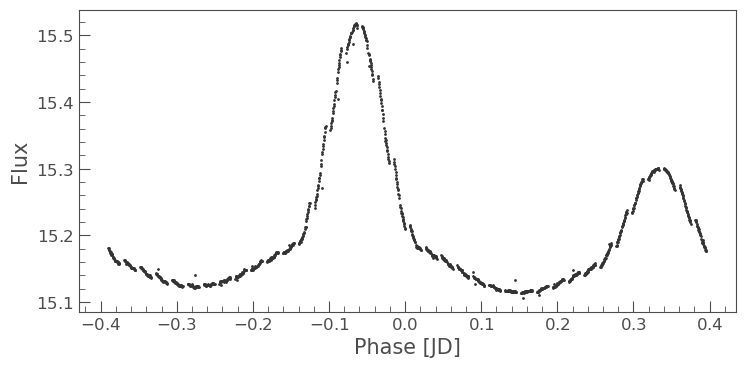

In [32]:
TICID = to999['TIC_ID'][19]
SECTOR = to999['Sector'][19]
CAMERA = to999['Camera'][19]
CCD = to999['CCD'][19]
url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
data = data.to_numpy(dtype=float)
    
lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0)
pg1 = lc.to_periodogram(oversample_factor=10)
pg2 = lc.to_periodogram(minimum_period=0.05*u.day, maximum_period=100*u.day,oversample_factor=10)
lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter()
print(pg1.period_at_max_power)
print(pg2.period_at_max_power)

/Users/jadyn/opt/anaconda3/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


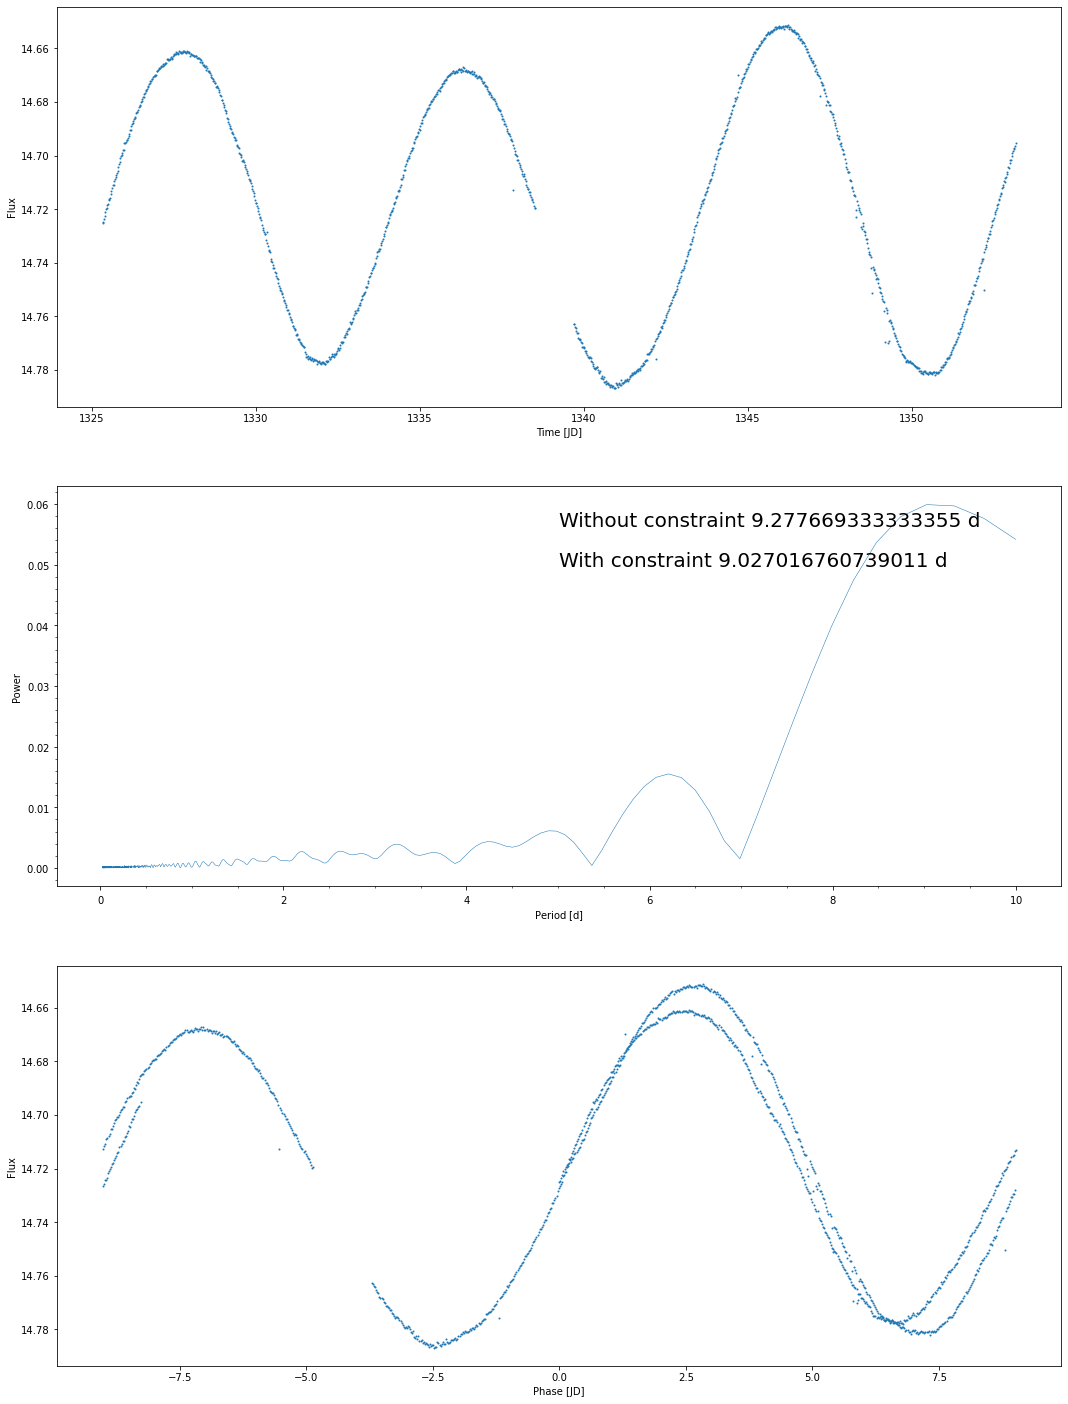

In [14]:
TICID = DCEP['TIC_ID'][26]
SECTOR = DCEP['Sector'][26]
CAMERA = DCEP['Camera'][26]
CCD = DCEP['CCD'][26]
url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
data = data.to_numpy(dtype=float)

lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0)
pg1 = lc.to_periodogram(oversample_factor=10)
pg2 = lc.to_periodogram(minimum_period=0.025*u.day, maximum_period=10*u.day,oversample_factor=10)

def plots(ax1,ax2,ax3):
            lc.scatter(ax=ax1)
            pg2.plot(ax=ax2)
            lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(18,25))
    
#ax1 = fig.add_subplot(311)
#ax2 = fig.add_subplot(312)
#ax3 = fig.add_subplot(313)

ax2.text(0.5, 0.9, f'Without constraint {pg1.period_at_max_power}', transform=ax2.transAxes, fontsize=20)
ax2.text(0.5, 0.8, f'With constraint {pg2.period_at_max_power}', transform=ax2.transAxes, fontsize=20)

ax1.invert_yaxis()
ax3.invert_yaxis()

plots(ax1,ax2,ax3)

In [12]:
with open('ECto999.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for item in ECto999:
        writer.writerow([item])

In [14]:
etesting = pd.read_csv('ECto999.csv', sep=',',header = None)
eff = pd.concat([etesting, to999], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
efe = efe.drop('index',axis = 1)
efe

,0,_1,Type,RAJ2000,DEJ2000,TIC_ID,Sector,Camera,CCD,ra,dec
0,yes,316.495762 -36.25944,1,316.49575,-36.25944,115105140,sector01,1,1,316.495762,-36.25944
1,yes,318.491003 -35.553266,1,318.49100,-35.55328,92982302,sector01,1,1,318.491003,-35.553266
2,yes,327.972633 -42.373205,1,327.97271,-42.37322,144194304,sector01,1,1,327.972633,-42.373205
3,yes,323.293521 -41.32472,1,323.29546,-41.32394,382223464,sector01,1,1,323.293521,-41.32472
4,yes,323.038982 -34.714245,1,323.03898,-34.71428,89428764,sector01,1,1,323.038982,-34.714245
...,...,...,...,...,...,...,...,...,...,...,...
322,yes,327.620513 -23.82022,1,327.60746,-23.82653,25283923,sector01,1,3,327.620513,-23.82022
323,yes,327.607429 -23.826495,1,327.60746,-23.82653,25283920,sector01,1,3,327.607429,-23.826495
324,yes,331.761388 -23.478331,1,331.76137,-23.47837,206487381,sector01,1,3,331.761388,-23.478331
325,yes,328.147426 -29.824022,1,328.1617,-29.81391,53894577,sector01,1,3,328.147426,-29.824022


In [9]:
DSCTall = []

In [10]:
%%capture

for i in range(len(DSCT['TIC_ID'])):
    
    TICID = DSCT['TIC_ID'][i]
    SECTOR = DSCT['Sector'][i]
    CAMERA = DSCT['Camera'][i]
    CCD = DSCT['CCD'][i]
    url = f"http://astro.phy.vanderbilt.edu/~oelkerrj/tess_ffi/sector01/clean/{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc"
    os.system(f"wget {url} -O {TICID}_{SECTOR}_{CAMERA}_{CCD}.lc > /dev/null 2>&1")
    
    data = pd.read_csv(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc",delimiter=' ',header=None,names=['time','magnitude','error'])
    data = data.to_numpy(dtype=float)
    
    lc = lk.LightCurve(time = data[:,0],flux = data[:,1]).remove_outliers(sigma=5.0)
    pg1 = lc.to_periodogram(oversample_factor=10)
    pg2 = lc.to_periodogram(minimum_period=0.001*u.day, maximum_period=10*u.day,oversample_factor=10)
        
    def plots(ax1,ax2,ax3):
        lc.scatter(ax=ax1)
        pg2.plot(ax=ax2)
        lc.remove_nans().fold(period=2*pg2.period_at_max_power).scatter(ax=ax3)

    if pg2.period_at_max_power.value > 0.4:
        DSCTall.append('no')

    else:
        
        window = tk.Tk()
        window.title(f"Is this an RR Lyrae? Index {i}")
        window.geometry("500x1000")

        fig, ax = plt.subplots(figsize=(18,25))
    
        ax1 = fig.add_subplot(311)
        ax2 = fig.add_subplot(312)
        ax3 = fig.add_subplot(313)
    
        ax1.invert_yaxis()
        ax3.invert_yaxis()

        plots(ax1,ax2,ax3)

        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas.draw()

        canvas_widget = canvas.get_tk_widget()
        canvas_widget.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        def yes_command():
            DSCTall.append('yes')
            window.destroy()
        
        def no_command():
            DSCTall.append('no')
            window.destroy()
        
        def on_key_press(event):
    # Check which key was pressed and invoke the respective button
            if event.keysym == 'y':
                yes_button.invoke()  # Simulate button 1 click
            elif event.keysym == 'n':
                no_button.invoke()
    
        yes_button = ttk.Button(window, text="Yes", command=yes_command)
        yes_button.pack(side=tk.LEFT)
    
        no_button = ttk.Button(window, text="No", command=no_command)
        no_button.pack(side=tk.RIGHT)
    
        window.bind('<y>', on_key_press)
        window.bind('<n>', on_key_press)

        window.mainloop()
    
    os.remove(f"{TICID}_{SECTOR}_{CAMERA}_{CCD}.lc")
    ;
;

: 

: 

In [2]:
DSCTall

NameError: name 'DSCTall' is not defined

In [ ]:
with open('DSCTall.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for item in DSCTall:
        writer.writerow([item])

In [16]:
dtesting = pd.read_csv('DSCTall.csv', sep=',',header = None)
dff = pd.concat([dtesting, DSCT], axis=1)
dz = []
for i in range(len(dff[0])):
    if dff[0][i] == 'no':
        dz.append(i)
        
dfe = dff.drop(dz)
dfe = dfe.reset_index()
dfe = dfe.drop('index',axis = 1)
dfe

FileNotFoundError: [Errno 2] No such file or directory: 'DSCTall.csv'

In [9]:
types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)
types = types.drop([0,1])
types = types.reset_index()
types = types.drop('index',axis = 1)

l = []
for i in range(len(types['_1'])):
    if type(types['_1'][i]) != str:
        l.append(i)
        
types = types.drop(l)
types = types.reset_index()
cropped = types.drop('index',axis = 1)
cropped

/var/folders/q0/j2_r46dn4g923tw2ygktb44w0000gn/T/ipykernel_36039/1314442412.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  types = pd.read_csv('asu.tsv', sep=';', comment='#',skip_blank_lines = False,header = 1)


,_1,Type,RAJ2000,DEJ2000
0,312.908065 -41.341475,MISC,312.90804,-41.34142
1,311.509773 -38.03733,NaN,NaN,NaN
2,316.664941 -45.311435,NaN,NaN,NaN
3,321.557516 -43.650433,NaN,NaN,NaN
4,318.57321 -39.753376,NaN,NaN,NaN
...,...,...,...,...
857989,40.806788 -62.554542,NaN,NaN,NaN
857990,48.994722 -70.857645,NaN,NaN,NaN
857991,29.295227 -65.853188,NaN,NaN,NaN
857992,46.080168 -62.32618,NaN,NaN,NaN


In [10]:
cam1 = pd.read_csv('Sector 01 (1).csv', sep=',', comment='#', dtype = str)
cam2 = pd.read_csv('Sector 01 (2).csv', sep=',', comment='#', dtype = str)
cam3 = pd.read_csv('Sector 01 (3).csv', sep=',', comment='#', dtype = str)
cams = pd.concat([cam1,cam2,cam3])
cams = cams.reset_index()
alldata = cams.drop('index',axis = 1)
alldata

,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,Unnamed: 13
0,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,NaN
1,311.509773,-38.03733,9.3120002746582,4.27500009536743,4.19899988174438,4.02699995040894,3343.0,8.72058,0.00757,18.55533867,6787.43283,0.10415349,8.16427,NaN
2,316.664941,-45.311435,7.92799997329712,5.51000022888184,5.4850001335144,5.38000011444092,4660.0,0.1555,0.00043,8.697815,56.49776,9.82695053,7.5447,NaN
3,321.557516,-43.650433,9.30099964141846,4.33199977874756,4.23799991607666,4.07600021362305,3180.0,16.56325,0.01331,12.65136727,59653.2397,0.10409945,8.02792,NaN
4,318.57321,-39.753376,8.51000022888184,4.88100004196167,4.83900022506714,4.71799993515015,3952.0,3.4978,0.00296,5.45745255,3953.34708,10.89407437,10.41665,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857989,40.806788,-62.554542,NaN,14.3319997787476,14.201000213623,9.37399959564209,3906.0,0.12196,0.01086,14.64927263,675.28947,13.916809,8.06362,NaN
857990,48.994722,-70.857645,17.3129997253418,15.8000001907349,15.6049995422363,9.47999954223633,NaN,-0.28832,0.00119,15.46312111,64.49011,13.916809,9.67914,NaN
857991,29.295227,-65.853188,17.4309997558594,15.0430002212524,15.4759998321533,9.25500011444092,4753.0,-0.24486,0.00222,7.32463632,30.26699,13.916809,11.62516,NaN
857992,46.080168,-62.32618,17.742000579834,14.8249998092651,14.5839996337891,9.42399978637695,4332.0,-0.20275,0.00649,14.64927263,128.57675,13.01413546,9.65545,NaN


In [11]:
stars = pd.concat([cropped, alldata], axis=1)

m = []
for i in range(len(stars['Type'])):
    if type(stars['Type'][i]) != str:
        m.append(i)
        
stars = stars.drop(m)
stars = stars.drop('Unnamed: 13', axis=1)
stars = stars.dropna(axis=0)
stars = stars.reset_index()
stars = stars.drop('index',axis = 1)
stars

,_1,Type,RAJ2000,DEJ2000,ra,dec,Vmag,Kmag,w1mag,w4mag,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE
0,312.908065 -41.341475,MISC,312.90804,-41.34142,312.908065,-41.341475,10.1590003967285,3.85199999809265,3.73200011253357,3.02600002288818,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144
1,325.888097 -43.14454,MISC,325.88804,-43.14456,325.888097,-43.14454,10.1979999542236,4.3270001411438,4.21199989318848,3.90599989891052,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651
2,316.58919 -37.587605,DSCT,316.58900,-37.58761,316.58919,-37.587605,7.67000007629395,6.79899978637695,6.68900012969971,6.76300001144409,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431
3,316.495762 -36.25944,EW,316.49575,-36.25944,316.495762,-36.25944,7.81099987030029,6.57299995422363,6.49300003051758,6.38700008392334,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553
4,320.519456 -42.76817,SRB,320.51950,-42.76814,320.519456,-42.76817,10.4829998016357,4.31699991226196,4.28599977493286,3.56200003623962,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,40.218723 -71.55455,VAR,40.17769,-71.55979,40.218723,-71.55455,17.0100002288818,15.2410001754761,15.1459999084473,9.42899990081787,5394.0,0.10081,0.00179,15.46312111,173.39735,0.1042076,8.773
20173,50.085421 -63.716766,EA,50.10655,-63.71658,50.085421,-63.716766,17.1189994812012,15.1639995574951,15.1899995803833,9.41699981689453,5181.0,2.77277,0.06068,0.20038602,2397.29459,0.20035915,11.69317
20174,38.415599 -70.746452,SRS,38.4805,-70.76797,38.415599,-70.746452,17.3059997558594,15.0249996185303,14.9259996414185,9.13399982452393,4851.0,7.01209,0.01693,7.13682513,686.66599,13.916809,10.53619
20175,47.326487 -64.232262,RRC,47.31803,-64.24475,47.326487,-64.232262,17.3169994354248,15.0790004730225,15.2650003433228,9.1540002822876,4891.0,0.34217,0.00719,0.3731048,2500.89979,0.37334696,9.18888


In [12]:
VmKmag = []
for i in range(len(stars['Kmag'])):
    VmKmag.append(float(stars['Vmag'][i]) - float(stars['Kmag'][i]))
    
w1mw4mag = []
for i in range(len(stars['w1mag'])):
    w1mw4mag.append(float(stars['w1mag'][i]) - float(stars['w4mag'][i]))

dict = {'VmKmag': VmKmag, 'w1mw4mag': w1mw4mag} 
   
calcs = pd.DataFrame(dict)
   
calcs 

,VmKmag,w1mw4mag
0,6.307000,0.706
1,5.871000,0.306
2,0.871000,-0.074
3,1.238000,0.106
4,6.166000,0.724
...,...,...
20172,1.769000,5.717
20173,1.955000,5.773
20174,2.281000,5.792
20175,2.237999,6.111


In [13]:
stars = pd.concat([stars, calcs], axis=1)
stars = stars.drop(['w1mag','w4mag','Vmag','Kmag','RAJ2000','DEJ2000','ra','dec'], axis=1)
stars

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,312.908065 -41.341475,MISC,2932.0,43.97405,0.02801,13.916504,1257.72272,0.10409945,8.77144,6.307000,0.706
1,325.888097 -43.14454,MISC,3070.0,30.66852,0.0231,11.59708667,2427.2134,0.10409945,7.5651,5.871000,0.306
2,316.58919 -37.587605,DSCT,6955.0,5.44499,0.00342,0.19195178,1053.53284,0.19192628,7.78431,0.871000,-0.074
3,316.495762 -36.25944,EW,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106
4,320.519456 -42.76817,SRB,2907.0,63.64927,0.04856,14.64895158,3442.16087,0.10420759,8.50958,6.166000,0.724
...,...,...,...,...,...,...,...,...,...,...,...
20172,40.218723 -71.55455,VAR,5394.0,0.10081,0.00179,15.46312111,173.39735,0.1042076,8.773,1.769000,5.717
20173,50.085421 -63.716766,EA,5181.0,2.77277,0.06068,0.20038602,2397.29459,0.20035915,11.69317,1.955000,5.773
20174,38.415599 -70.746452,SRS,4851.0,7.01209,0.01693,7.13682513,686.66599,13.916809,10.53619,2.281000,5.792
20175,47.326487 -64.232262,RRC,4891.0,0.34217,0.00719,0.3731048,2500.89979,0.37334696,9.18888,2.237999,6.111


In [14]:
h = []
for i in range(len(stars['Type'])):
    if 'RR' not in stars['Type'][i]:
        h.append(i)
RR = stars.drop(h)

for val in RR.Type.unique():
    RR.replace(to_replace=val, value=0, inplace=True)

RR = RR.head(1000)
RR = RR.reset_index()
RR = RR.drop('index',axis = 1)
RR

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,313.037168 -44.117469,0,6689.0,-0.24584,0.00017,2.35872949,97.95273,5.36226045,7.84118,1.030000,0.062
1,316.707735 -39.548101,0,4995.5,-0.2949,0.00015,12.10130783,46.88342,13.01386874,10.6711,1.991000,0.015
2,313.037233 -38.375238,0,5135.0,0.8386,0.00204,11.1332032,3955.68909,10.33303424,7.46914,2.121000,-0.028
3,325.529948 -41.746186,0,4206.0,0.26542,0.0012,3.81274082,135.76632,7.31803081,9.67678,3.009000,0.117
4,322.482535 -42.717335,0,4478.0,-0.14223,0.00044,1.04635368,16.44768,6.00410837,6.54329,2.210999,-0.065
...,...,...,...,...,...,...,...,...,...,...,...
995,334.027253 -36.660483,0,4423.0,-0.26517,0.01448,13.895996,8.2186,0.48530294,4.42222,2.792000,4.758
996,340.870455 -35.50915,0,5106.0,0.31543,0.04135,0.57746095,27.95373,0.1042076,5.63715,2.023999,5.346
997,331.534999 -40.14617,0,4542.0,-0.11135,0.01676,16.33595176,49.68728,13.885559,10.35215,2.638000,4.270
998,333.457005 -30.610206,0,4199.0,0.24909,0.03456,14.64927263,80.65951,13.01413546,10.37323,3.113000,4.720


In [15]:
testing = pd.read_csv('RRto999.csv', sep=',',header = None)
ff = pd.concat([testing, RR], axis=1)
z = []
for i in range(len(ff[0])):
    if ff[0][i] == 'no':
        z.append(i)
        
fe = ff.drop(z)
fe = fe.reset_index()
RR_clean = fe.drop('index',axis = 1)
RR_clean

,0,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,317.874596 -45.074533,0,6550.72998046875,107.2074,0.19689,0.47987945,4006.37974,0.47952836,7.73175,1.268000,0.233000
1,yes,314.242637 -36.351275,0,6440.0,0.67236,0.00336,0.48405231,1298.35401,0.48415681,8.88382,1.248000,0.698999
2,yes,327.692884 -44.602821,0,4689.0,0.0218,0.00148,0.60375289,407.2881,0.60358747,9.49289,2.386000,0.769000
3,yes,318.143893 -39.92548,0,4591.0,-0.1477,0.00093,0.69236338,512.21586,0.69326501,8.70122,2.370000,0.368000
4,yes,316.788097 -36.105288,0,4570.0,0.06897,0.00241,0.55334012,601.02614,0.55362406,9.59394,2.521000,1.002999
...,...,...,...,...,...,...,...,...,...,...,...,...
247,yes,335.088988 -36.074448,0,5678.0,2.33382,0.03936,0.69237856,3001.97179,0.69087863,9.63431,1.547000,5.200000
248,yes,334.871646 -37.971968,0,6500.0,-0.2639,0.00886,17.382965,17.54951,7.31522813,7.17586,1.028000,5.770000
249,yes,340.870455 -35.50915,0,5106.0,0.31543,0.04135,0.57746095,27.95373,0.1042076,5.63715,2.023999,5.346000
250,yes,331.534999 -40.14617,0,4542.0,-0.11135,0.01676,16.33595176,49.68728,13.885559,10.35215,2.638000,4.270000


In [16]:
h = []
for i in range(len(stars['Type'])):
    if 'EC' not in stars['Type'][i]:
        if 'EW' not in stars['Type'][i]:
            h.append(i)
EC = stars.drop(h)

for val in EC.Type.unique():
    EC.replace(to_replace=val, value=1, inplace=True)

EC = EC.head(1000)
EC = EC.reset_index()
EC = EC.drop('index',axis = 1)
EC

,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,316.495762 -36.25944,1,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106000
1,315.98764 -42.852323,1,3660.0,8.4157,0.01285,9.27766933,1374.70683,0.10420759,8.23016,4.091000,0.244000
2,322.869983 -38.556416,1,4538.0,3.18539,0.0043,11.1332032,7921.06287,10.89407437,11.78836,2.559000,-0.022000
3,311.249716 -38.66717,1,4504.7998046875,-0.02237,0.00067,0.20227477,82.11215,0.4041821,7.36452,2.917000,0.106000
4,318.491003 -35.553266,1,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986000,0.296000
...,...,...,...,...,...,...,...,...,...,...,...
995,314.793789 -26.367414,1,4699.89990234375,-0.15998,0.00096,19.85089929,140.43869,13.8956295,8.82122,2.813000,0.442000
996,312.16838 -25.443704,1,4368.60009765625,0.36279,0.00244,0.18928808,1505.75314,0.18920369,10.62114,2.788000,-0.008000
997,310.191949 -28.796649,1,5973.0,0.31838,0.00511,8.97169516,101.04935,0.10409887,8.35142,1.505000,1.223001
998,320.622812 -27.250574,1,3906.0,0.66238,0.00417,6.47279233,3518.14652,10.33303397,8.54848,3.532001,-0.089000


In [17]:
etesting = pd.read_csv('ECto999.csv', sep=',',header = None)
eff = pd.concat([etesting, EC], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
EC_clean = efe.drop('index',axis = 1)
EC_clean

,0,_1,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,yes,316.495762 -36.25944,1,6229.0,159.30206,0.08317,0.20540965,13818.54387,0.2052788,9.75553,1.238000,0.106000
1,yes,318.491003 -35.553266,1,6883.0,51.74774,0.08502,0.47741009,8903.95492,0.95354707,9.88294,0.986000,0.296000
2,yes,327.972633 -42.373205,1,6387.0,55.65692,0.09777,0.24181588,5016.73265,0.48299134,9.55993,1.126000,0.194000
3,yes,323.293521 -41.32472,1,6194.60009765625,9.75826,0.01535,0.16324345,12490.30337,0.32655821,10.03388,0.819000,0.576000
4,yes,323.038982 -34.714245,1,6746.0,36.09449,0.06805,0.18831535,15986.34397,0.37685288,9.45104,0.900000,1.114000
...,...,...,...,...,...,...,...,...,...,...,...,...
322,yes,310.766231 -32.372492,1,6073.0,-0.23056,0.00032,12.64187864,61.62514,11.512384,10.65025,1.430000,-0.003000
323,yes,314.648143 -24.384348,1,4666.7001953125,-0.19159,0.0008,0.14222283,87.86762,0.28443168,7.3188,2.613000,0.224999
324,yes,311.827298 -24.588704,1,6915.0,1.3925,0.00552,0.82346175,525.01066,0.8242752,6.47214,0.993000,1.509000
325,yes,310.543692 -26.53155,1,6022.89990234375,1.08046,0.00468,0.20420401,2832.1553,0.20423404,9.29995,1.403000,0.594999


In [18]:
test = pd.concat([RR_clean,EC_clean])
test = test.drop(columns = [0])
test = test.drop(columns = ['_1'])
test

,Type,Teff,Jstet,RMS_60m,LS_Period,LS_SNR,BLS_Period,BLS_SDE,VmKmag,w1mw4mag
0,0,6550.72998046875,107.2074,0.19689,0.47987945,4006.37974,0.47952836,7.73175,1.268000,0.233000
1,0,6440.0,0.67236,0.00336,0.48405231,1298.35401,0.48415681,8.88382,1.248000,0.698999
2,0,4689.0,0.0218,0.00148,0.60375289,407.2881,0.60358747,9.49289,2.386000,0.769000
3,0,4591.0,-0.1477,0.00093,0.69236338,512.21586,0.69326501,8.70122,2.370000,0.368000
4,0,4570.0,0.06897,0.00241,0.55334012,601.02614,0.55362406,9.59394,2.521000,1.002999
...,...,...,...,...,...,...,...,...,...,...
322,1,6073.0,-0.23056,0.00032,12.64187864,61.62514,11.512384,10.65025,1.430000,-0.003000
323,1,4666.7001953125,-0.19159,0.0008,0.14222283,87.86762,0.28443168,7.3188,2.613000,0.224999
324,1,6915.0,1.3925,0.00552,0.82346175,525.01066,0.8242752,6.47214,0.993000,1.509000
325,1,6022.89990234375,1.08046,0.00468,0.20420401,2832.1553,0.20423404,9.29995,1.403000,0.594999


In [19]:
def bestcols(dataset,cols,classifier,numcols,silhouette):
    start_time = datetime.now()

    dict2 = {}
    dict3 = {}
    dict4 = {}
    dict5 = {}

    for val in cols:
        for val2 in cols:
            vals2 = [val,val2]
            if len(vals2) == len(set(vals2)) and numcols >= len(vals2):
                X = dataset[vals2]
                X = X.apply(pd.to_numeric)
                Y = dataset['Type']
                X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                cl = classifier
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                    cl.fit(X_train, y_train)
                if silhouette == False:
                    ypred = cl.predict(X_test)
                    score = metrics.accuracy_score(y_test, ypred)
                if silhouette == True:
                    ypred = cl.fit_predict(X_test)
                    score = silhouette_score(X_test, ypred)

                dict2.update({score:vals2})
                
            for val3 in cols:
                vals3 = [val,val2,val3]
                if len(vals3) == len(set(vals3)) and numcols >= len(vals3):
                
                    X = dataset[vals3]
                    X = X.apply(pd.to_numeric)
                    Y = dataset['Type']
                    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                    cl = classifier
                    with warnings.catch_warnings():
                        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                        cl.fit(X_train, y_train)
                    if silhouette == False:
                        ypred = cl.predict(X_test)
                        score = metrics.accuracy_score(y_test, ypred)
                    if silhouette == True:
                        ypred = cl.fit_predict(X_test)
                        score = silhouette_score(X_test, ypred)

                    dict3.update({score:vals3})
                
                for val4 in cols:
                    vals4 = [val,val2,val3,val4]
                    if len(vals4) == len(set(vals4)) and numcols >= len(vals4):
                    
                        X = dataset[vals4]
                        X = X.apply(pd.to_numeric)
                        Y = dataset['Type']
                        X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                        cl = classifier
                        with warnings.catch_warnings():
                            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                            cl.fit(X_train, y_train)
                        if silhouette == False:
                            ypred = cl.predict(X_test)
                            score = metrics.accuracy_score(y_test, ypred)
                        if silhouette == True:
                            ypred = cl.fit_predict(X_test)
                            score = silhouette_score(X_test, ypred)

                        dict4.update({score:vals4})
                        
                    for val5 in cols:
                        vals5 = [val,val2,val3,val4,val5]
                        if len(vals4) == len(set(vals5)) and numcols >= len(vals5):
                    
                            X = dataset[vals5]
                            X = X.apply(pd.to_numeric)
                            Y = dataset['Type']
                            X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, train_size=0.75)
                
                            cl = classifier
                            with warnings.catch_warnings():
                                warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
                                cl.fit(X_train, y_train)
                            if silhouette == False:
                                ypred = cl.predict(X_test)
                                score = metrics.accuracy_score(y_test, ypred)
                            if silhouette == True:
                                ypred = cl.fit_predict(X_test)
                                score = silhouette_score(X_test, ypred)

                            dict5.update({score:vals5})
                    
    if numcols >= len(vals2):          
        scores2 = list(dict2.keys())
        maxscore2 = max(scores2)
        cols2 = dict2[maxscore2]
        print(maxscore2,cols2)
    
    if numcols >= len(vals3):           
        scores3 = list(dict3.keys())
        maxscore3 = max(scores3)
        cols3 = dict3[maxscore3]
        print(maxscore3,cols3)
    
    if numcols >= len(vals4):
        scores4 = list(dict4.keys())
        maxscore4 = max(scores4)
        cols4 = dict4[maxscore4]
        print(maxscore4,cols4)
        
    if numcols >= len(vals5):
        scores5 = list(dict5.keys())
        maxscore5 = max(scores5)
        cols5 = dict5[maxscore5]
        print(maxscore5,cols5)

    X = dataset.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = dataset['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.25, train_size=.75)

    cl = classifier
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
        cl.fit(X_train, y_train)
    ypred = cl.predict(X_test)
    score = metrics.accuracy_score(y_test, ypred)

    print(score,"All columns")

    end_time = datetime.now()
    print('Duration: {}'.format(end_time - start_time))

In [20]:
cols = ['Teff','Jstet','RMS_60m','LS_Period','LS_SNR','BLS_Period','BLS_SDE','VmKmag','w1mw4mag']

In [21]:
bestcols(test,cols,RandomForestClassifier(random_state=50,n_estimators=10),4,False)

0.7931034482758621 ['Jstet', 'LS_Period']
0.8275862068965517 ['LS_Period', 'BLS_Period', 'BLS_SDE']
0.8551724137931035 ['LS_Period', 'BLS_SDE', 'VmKmag', 'LS_SNR']
0.7448275862068966 All columns
Duration: 0:00:33.894288


In [22]:
bestcols(test,cols,KNeighborsClassifier(n_neighbors=10),4,False)

0.7655172413793103 ['BLS_Period', 'LS_Period']
0.7931034482758621 ['BLS_Period', 'RMS_60m', 'LS_Period']
0.7931034482758621 ['BLS_Period', 'RMS_60m', 'LS_Period', 'BLS_SDE']
0.6344827586206897 All columns
Duration: 0:00:12.728177


In [23]:
bestcols(test,cols,MLPClassifier(solver='lbfgs', alpha=0.001,hidden_layer_sizes=(15,), max_iter=10,random_state=1),4,False)

0.7034482758620689 ['LS_SNR', 'VmKmag']
0.7034482758620689 ['LS_SNR', 'RMS_60m', 'BLS_SDE']
0.7517241379310344 ['LS_Period', 'w1mw4mag', 'RMS_60m', 'BLS_Period']
0.6 All columns
Duration: 0:00:18.937378


In [24]:
bestcols(test,cols,KMeans(n_clusters = 2, random_state = 0, n_init=10),4,True)

0.9619233905970922 ['Jstet', 'RMS_60m']
0.9671583012676263 ['Jstet', 'BLS_SDE', 'w1mw4mag']
0.966096494109154 ['BLS_SDE', 'w1mw4mag', 'Jstet', 'VmKmag']
0.4068965517241379 All columns
Duration: 0:00:56.798540


In [25]:
X = pd.concat([test['BLS_SDE'],test['Jstet'],test['BLS_Period'],test['LS_Period']], axis=1)
X = X.apply(pd.to_numeric)
Y = test['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)

forest = RandomForestClassifier(random_state=50,n_estimators=10)
forest.fit(X_train, y_train)

ypredfor = forest.predict(X_test)

metrics.accuracy_score(y_test, ypredfor)

0.7298850574712644

In [26]:
metrics.confusion_matrix(y_test, ypredfor)

array([[60, 21],
       [26, 67]])

In [27]:
X = pd.concat([test['BLS_SDE'],test['Jstet'],test['RMS_60m'],test['LS_Period']], axis=1)
X = X.apply(pd.to_numeric)
Y = test['Type']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, train_size=0.7)



In [28]:
def typetest(test,testsize,trainsize,nneighbors,nclusters,a):
    
    
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    knn = KNeighborsClassifier(n_neighbors=nneighbors)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    
    knnscore = metrics.accuracy_score(y_test, ypred)
    knnmatrix = metrics.confusion_matrix(y_test, ypred)
    print('KNeighborsClassifier:',knnscore)
    print(knnmatrix)
    print(' ')
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=50,n_estimators=100)
    forest.fit(X_train, y_train)
    ypredfor = forest.predict(X_test)
    
    forscore = metrics.accuracy_score(y_test, ypredfor)
    formatrix = metrics.confusion_matrix(y_test, ypredfor)
    print('RandomForestClassifier:',forscore)
    print(formatrix)
    print(' ')
    
    kmeans = KMeans(n_clusters = nclusters, random_state = 0, n_init=100)
    kmeans.fit(X_train)
    ypredkmeans = kmeans.predict(X_test)
    
    silhouette_avg = silhouette_score(X_test, ypredkmeans)
    inertia = kmeans.inertia_
    print("KMeans Silhouette Score:", silhouette_avg)
    print("KMeans Inertia:", inertia)
    print(' ')
    
    mlp = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(15,), max_iter=1000,random_state=1)
    mlp.fit(X_train, y_train)
    ypredmlp = mlp.predict(X_test)
    
    mlpscore = metrics.accuracy_score(y_test, ypredmlp)
    mlpmatrix = metrics.confusion_matrix(y_test, ypredmlp)
    print('MLPClassifier (Multi-layer Perceptron):',mlpscore)
    print(mlpmatrix)
    print(' ')
    
def importance(test,testsize,trainsize):
    X = test.drop(columns = ['Type'])
    X = X.apply(pd.to_numeric)
    Y = test['Type']
    X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=testsize, train_size=trainsize)
    
    feature_names = [f"{val}" for val in list(X.columns.values)]
    forest = RandomForestClassifier(random_state=0,n_estimators=10)
    forest.fit(X_train, y_train)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots(figsize=(15,10))
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()
    
    rf = Pipeline([("classifier", RandomForestClassifier(random_state=42))])
    rf.fit(X_train, y_train)
    result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=10)
    sorted_importances_idx = result.importances_mean.argsort()
    importances = pd.DataFrame(result.importances[sorted_importances_idx].T,columns=X.columns[sorted_importances_idx])
    ax = importances.plot.box(vert=False, whis=10,figsize=(15,10))
    ax.set_title("Permutation Importances (test set)")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.set_xlabel("Decrease in accuracy score")
    ax.figure.tight_layout()

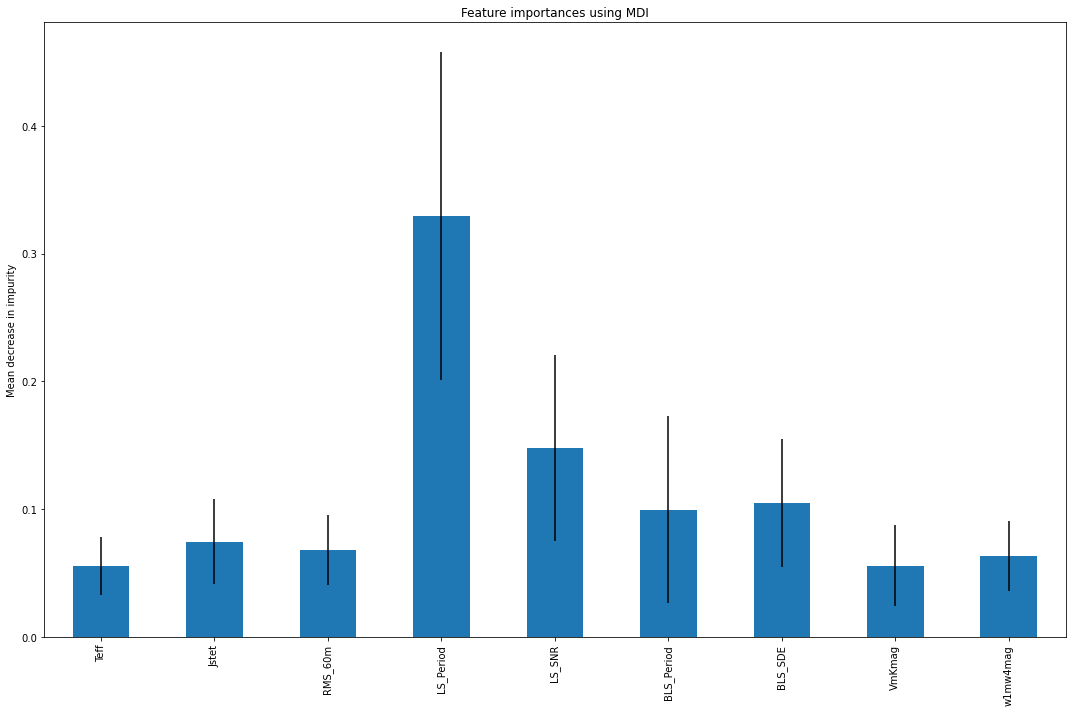

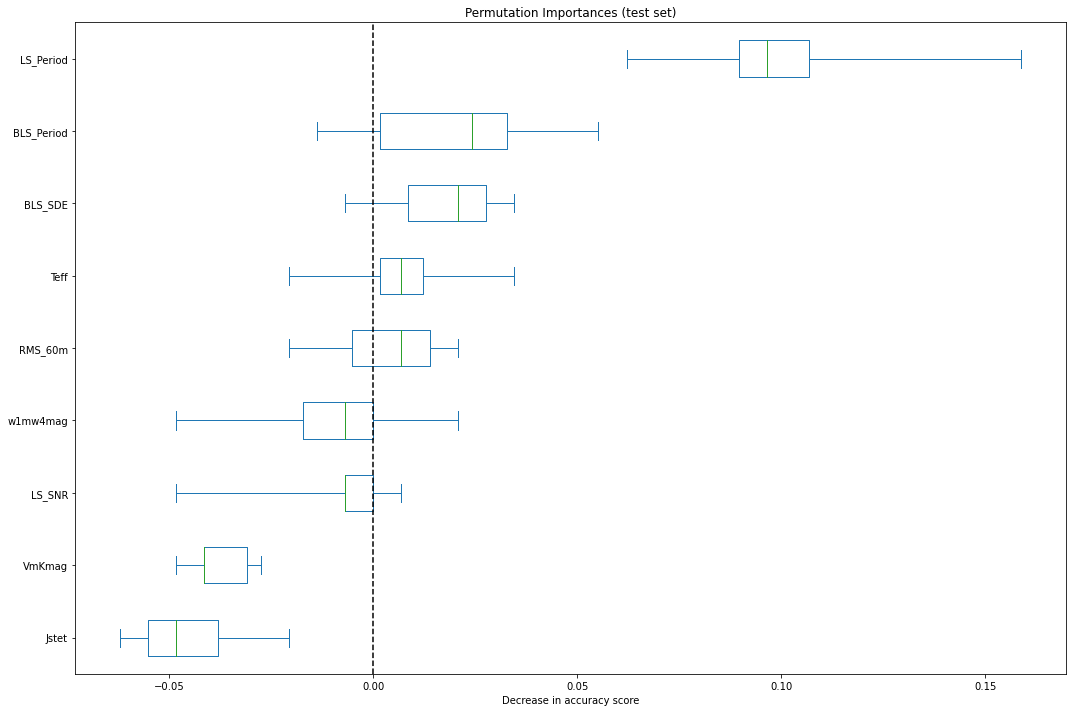

In [29]:
importance(test,0.25,0.75)

In [30]:
test = 
typetest(test,0.25,0.75,10,6,0.1)

SyntaxError: invalid syntax (3559524101.py, line 1)

In [ ]:
dtesting = pd.read_csv('DSCT.csv', sep=',',header = None)
eff = pd.concat([etesting, EC], axis=1)
ez = []
for i in range(len(eff[0])):
    if eff[0][i] == 'no':
        ez.append(i)
        
efe = eff.drop(ez)
efe = efe.reset_index()
EC_clean = efe.drop('index',axis = 1)
EC_clean

In [ ]:
Test